In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Computational Mechanics Project #01 - Heat Transfer in Forensic Science

We can use our current skillset for a macabre application. We can predict the time of death based upon the current temperature and change in temperature of a corpse. 

Forensic scientists use Newton's law of cooling to determine the time elapsed since the loss of life, 

$\frac{dT}{dt} = -K(T-T_a)$,

where $T$ is the current temperature, $T_a$ is the ambient temperature, $t$ is the elapsed time in hours, and $K$ is an empirical constant. 

Suppose the temperature of the corpse is 85$^o$F at 11:00 am. Then, 2 hours later the temperature is 74$^{o}$F. 

Assume ambient temperature is a constant 65$^{o}$F.

1. Use Python to calculate $K$ using a finite difference approximation, $\frac{dT}{dt} \approx \frac{T(t+\Delta t)-T(t)}{\Delta t}$.

In [2]:
T_f = 74
T_i = 85
T_a = 65
dt = 2
dT_dt = (T_f - T_i)/ dt

K = - dT_dt / (T_f - T_a)
print(f'K={K} per hour')

K=0.6111111111111112 per hour


2. Change your work from problem 1 to create a function that accepts the temperature at two times, ambient temperature, and the time elapsed to return $K$.

In [3]:
def K(T_i, T_f, T_a, dt):
    '''Function that accepts the temperature at two times, ambient temperature, and the time elapsed to return 𝐾
    T_i = Initial temperature
    T_f = Final temperature
    T_a = Ambient temperature
    Governing equation: dT/dt = -K(T-T_a)
    '''
    dT_dt = (T_f - T_i) / dt
    K = - dT_dt / (T_f - T_a)
    return K

3. A first-order thermal system has the following analytical solution, 

    $T(t) =T_a+(T(0)-T_a)e^{-Kt}$

    where $T(0)$ is the temperature of the corpse at t=0 hours i.e. at the time of discovery and $T_a$ is a constant ambient temperature. 

    a. Show that an Euler integration converges to the analytical solution as the time step is decreased. Use the constant $K$ derived above and the initial temperature, T(0) = 85$^o$F. 

    b. What is the final temperature as t$\rightarrow\infty$?
    
    c. At what time was the corpse 98.6$^{o}$F? i.e. what was the time of death?

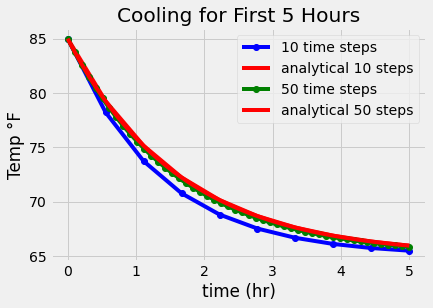

In [4]:
#part a
T_f = 74
T_i = 85
T_a = 65
dt = 2
dT_dt = (T_f - T_i)/ dt

K = - dT_dt / (T_f - T_a)
t_10 = np.linspace(0,5,10)
t_50 = np.linspace(0,5,50)


def cooling_law(T_i,T_a, K, t):
    T_f_ana = T_a + (T_i - T_a) * np.exp(-K*t)
    T_f_num = np.zeros(len(t))
    T_f_num[0] = T_i
    for i in range(1,len(t)):
        T_f_num[i] = -K*(T_f_num[i-1] - T_a)*(t[i]-t[i-1]) + T_f_num[i-1]
    
    return T_f_ana, T_f_num

T_10_ana, T_f10_num = cooling_law(T_i, T_a, K, t_10)

T_50_ana, T_f50_num = cooling_law(T_i, T_a, K, t_50)

plt.plot(t_10, T_f10_num, 'b-o', label= '10 time steps')
plt.plot(t_10, T_10_ana, 'r-', label= 'analytical 10 steps')
plt.title('Cooling for First 5 Hours')
plt.xlabel('time (hr)')
plt.ylabel('Temp \N{DEGREE SIGN}F')
plt.plot(t_50, T_f50_num, 'g-o', label= '50 time steps')
plt.plot(t_50, T_50_ana, 'r-', label= 'analytical 50 steps')
plt.legend();

Part a: Looking at the both graphs, it can be shown that as the time step decreases the Euler integration approaches the analytical solution. There is little difference between the analytical solution at 10 time steps vs 50 time steps, so that is why they are the same line.

Part b: The final temperature as t--> infinity is the ambient temperature.

In [5]:
#part C
T_f = 74
T_i = 85
T_a = 65
dt = 2
dT_dt = (T_f - T_i)/ dt

K = - dT_dt / (T_f - T_a)
t_death = np.log((98.6 - T_a)/ (T_i - T_a)) / -K

print(t_death*60)
print('Time of death is 10:10 am')

-50.93611789894371
Time of death is 10:10 am


4. Now that we have a working numerical model, we can look at the results if the
ambient temperature is not constant i.e. T_a=f(t). We can use the weather to improve our estimate for time of death. Consider the following Temperature for the day in question. 

    |time| Temp ($^o$F)|
    |---|---|
    |6am|50|
    |7am|51|
    |8am|55|
    |9am|60|
    |10am|65|
    |11am|70|
    |noon|75|
    |1pm|80|

    a. Create a function that returns the current temperature based upon the time (0 hours=11am, 75$^{o}$F) 
    *Plot the function $T_a$ vs time. Does it look correct? Is there a better way to get $T_a(t)$?

    b. Modify the Euler approximation solution to account for changes in temperature at each hour. 
    Compare the new nonlinear Euler approximation to the linear analytical model. 
    At what time was the corpse 98.6$^{o}$F? i.e. what was the time of death?

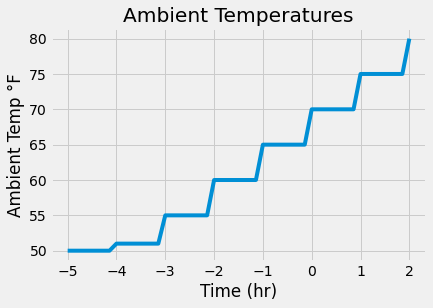

In [6]:
#part a

def ambient_temp(time):
    temp = np.array([50, 51, 55, 60, 65, 70, 75, 80])
    if 0<= time < 1:
        return temp[5]
    elif -1<= time < 0:
        return temp[4]
    elif -2<= time < -1:
        return temp[3]
    elif -3<= time < -2:
        return temp[2]
    elif -4<= time < -3:
        return temp[1]
    elif -5<= time < -4:
        return temp[0]
    elif -5> time:
        return temp[0]
    elif 1<= time < 2:
        return temp[6]
    elif 2<= time:
        return temp[7]

t = np.linspace(-5, 2)
temps = np.array([ambient_temp(t[i]) for i in range(len(t))])
    
plt.plot(t, temps)
plt.ylabel('Ambient Temp \N{DEGREE SIGN}F')
plt.xlabel('Time (hr)')
plt.title('Ambient Temperatures');

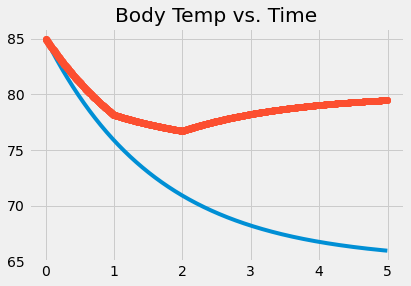

In [7]:
def cooling_law_changing_ambient(T_i, K, t):
    T_a = np.array([ambient_temp(t[i]) for i in range(len(t))])
    T_f_num = np.zeros(len(t))
    T_f_ana = np.zeros(len(t))
    T_f_num[0] = T_i
    T_f_ana = 65 + (T_i - 65) * np.exp(-K*t)
    for i in range(1,len(t)):
        T_f_num[i] = -K*(T_f_num[i-1] - T_a[i])*(t[i]-t[i-1]) + T_f_num[i-1]
    
    return T_f_ana, T_f_num, T_a

T_f = 74
T_i = 85
T_a = 65
dt = 2
dT_dt = (T_f - T_i)/ dt

K = - dT_dt / (T_f - T_a)

t_10 = np.linspace(0, 5,1000)

T_ana, T_num, T_a = cooling_law_changing_ambient(T_i, K, t_10)

plt.title('Body Temp vs. Time')
plt.plot(t_10[:-1], T_ana[:-1])
plt.plot(t_10[:-1], T_num[:-1], '-o')

The new non-linear Euler approximation is very different from the linear analytical method even with 1000 time steps. The models do not noverge at all.

[-0.85585586]
Time of death is about 10:09 am


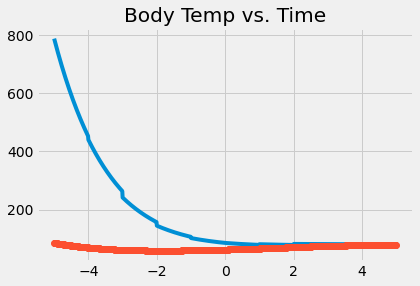

In [8]:
def cooling_law_changing_ambient_ana(T_i, K, t):
    T_a = np.array([ambient_temp(t[i]) for i in range(len(t))])
    T_f_num = np.zeros(len(t))
    T_f_ana = np.zeros(len(t))
    T_f_num[0] = T_i
    for i in range(1,len(t)):
        T_f_ana[i-1] = T_a[i-1] + (T_i - T_a[i-1]) * np.exp(-K*t[i])
        T_f_num[i] = -K*(T_f_num[i-1] - T_a[i])*(t[i]-t[i-1]) + T_f_num[i-1]
    
    return T_f_ana, T_f_num, T_a

T_f = 74
T_i = 85
T_a = 65
dt = 2
dT_dt = (T_f - T_i)/ dt

K = - dT_dt / (T_f - T_a)

t_10 = np.linspace(-5, 5,1000)
T_ana, T_num, T_a = cooling_law_changing_ambient_ana(T_i, K, t_10)
plt.plot(t_10[:-1], T_ana[:-1])
plt.plot(t_10[:-1], T_num[:-1], '-o')
plt.title('Body Temp vs. Time')

np.isclose(T_10_ana, [98.6], atol=1e-04)
print(t_10[np.isclose(T_ana, 98.6, rtol=1e-3)])
print('Time of death is about 10:09 am')